In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
listings = pd.read_csv("listings.csv")
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [3]:
listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
id                                22552 non-null int64
name                              22493 non-null object
host_id                           22552 non-null int64
host_name                         22526 non-null object
neighbourhood_group               22552 non-null object
neighbourhood                     22552 non-null object
latitude                          22552 non-null float64
longitude                         22552 non-null float64
room_type                         22552 non-null object
price                             22552 non-null int64
minimum_nights                    22552 non-null int64
number_of_reviews                 22552 non-null int64
last_review                       18644 non-null object
reviews_per_month                 18638 non-null float64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64

In [16]:
from geopy.distance import great_circle

def distance_from_berlin(lat, lon):
    berlin_centre = (52.5027778, 13.404166666666667)
    record = (lat, lon)
    return great_circle(berlin_centre, record).km

#add distanse dataset
listings['distance_km'] = listings.apply(lambda x: distance_from_berlin(x.latitude, x.longitude), axis=1)

del listings['latitude']
del listings['longitude']
listings.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance_km
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,2018-10-28,3.76,4,141,3.533182


In [17]:
del_cols = ['name','host_id','host_name','neighbourhood_group','neighbourhood']
for i in del_cols:
    del listings[i]
listings.head()

,id,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance_km
0,2015,Entire home/apt,60,4,118,2018-10-28,3.76,4,141,3.533182
1,2695,Private room,17,2,6,2018-10-01,1.42,1,0,5.085573
2,3176,Entire home/apt,90,62,143,2017-03-20,1.25,1,220,3.695677
3,3309,Private room,26,5,25,2018-08-16,0.39,1,297,3.755285
4,7071,Private room,42,2,197,2018-11-04,1.75,1,26,4.550423


In [18]:
listings.shape

(22552, 10)

In [19]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 10 columns):
id                                22552 non-null int64
room_type                         22552 non-null object
price                             22552 non-null int64
minimum_nights                    22552 non-null int64
number_of_reviews                 22552 non-null int64
last_review                       18644 non-null object
reviews_per_month                 18638 non-null float64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64
distance_km                       22552 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.7+ MB


In [20]:
listings.room_type.value_counts()

Private room       11534
Entire home/apt    10722
Shared room          296
Name: room_type, dtype: int64

In [30]:
def con_2_cat(df,col):
    for i in col:
        ele = pd.Categorical(df[i])
        dummies = pd.get_dummies(ele,prefix = i)
        df = pd.concat([df,dummies],axis = 1)
        del df[i]
    return df

In [36]:
cat_cols = ['room_type']
listings1 = con_2_cat(listings,cat_cols)
listings1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 12 columns):
id                                22552 non-null int64
price                             22552 non-null int64
minimum_nights                    22552 non-null int64
number_of_reviews                 22552 non-null int64
last_review                       18644 non-null object
reviews_per_month                 18638 non-null float64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64
distance_km                       22552 non-null float64
room_type_Entire home/apt         22552 non-null uint8
room_type_Private room            22552 non-null uint8
room_type_Shared room             22552 non-null uint8
dtypes: float64(2), int64(6), object(1), uint8(3)
memory usage: 1.6+ MB


In [38]:
del listings1['last_review']

In [40]:
listings1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 11 columns):
id                                22552 non-null int64
price                             22552 non-null int64
minimum_nights                    22552 non-null int64
number_of_reviews                 22552 non-null int64
reviews_per_month                 18638 non-null float64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64
distance_km                       22552 non-null float64
room_type_Entire home/apt         22552 non-null uint8
room_type_Private room            22552 non-null uint8
room_type_Shared room             22552 non-null uint8
dtypes: float64(2), int64(6), uint8(3)
memory usage: 1.4 MB


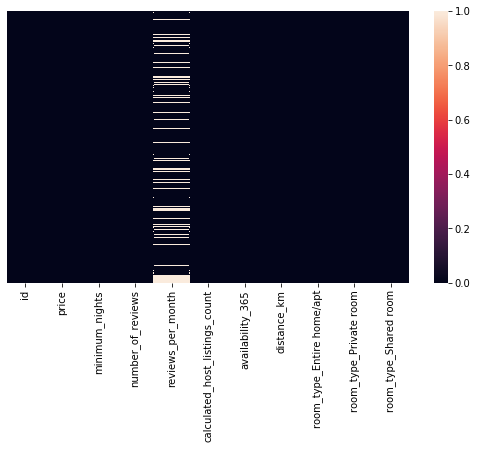

In [41]:
fig,ax = plt.subplots(figsize = (9,5))
sns.heatmap(listings1.isnull(),yticklabels = '')
plt.show()

In [42]:
del listings1['reviews_per_month']

In [43]:
listings1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 10 columns):
id                                22552 non-null int64
price                             22552 non-null int64
minimum_nights                    22552 non-null int64
number_of_reviews                 22552 non-null int64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64
distance_km                       22552 non-null float64
room_type_Entire home/apt         22552 non-null uint8
room_type_Private room            22552 non-null uint8
room_type_Shared room             22552 non-null uint8
dtypes: float64(1), int64(6), uint8(3)
memory usage: 1.3 MB


In [45]:
listings1 = listings1.astype(float)
listings1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 10 columns):
id                                22552 non-null float64
price                             22552 non-null float64
minimum_nights                    22552 non-null float64
number_of_reviews                 22552 non-null float64
calculated_host_listings_count    22552 non-null float64
availability_365                  22552 non-null float64
distance_km                       22552 non-null float64
room_type_Entire home/apt         22552 non-null float64
room_type_Private room            22552 non-null float64
room_type_Shared room             22552 non-null float64
dtypes: float64(10)
memory usage: 1.7 MB


In [46]:
list_summary = pd.read_csv('listings_summary.csv')

In [47]:
list_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
id                                  22552 non-null int64
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
space                               14020 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
neighborhood_overview               11540 non-null object
notes                               7215 non-null object
transit                             13036 non-null object
access                              10837 non-null object
interaction                         10406 non-null object
house_rules                         11449 non-null object
thumbnail_url           

In [69]:
list_summary1 = list_summary.loc[:,list_summary.notnull().sum()/len(list_summary) > 0.7] # removing columns with null values greater than 30 porcent

In [70]:
list_summary1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 75 columns):
id                                  22552 non-null int64
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
picture_url                         22552 non-null object
host_id                             22552 non-null int64
host_url                            22552 non-null object
host_name                           22526 non-null object
host_since                          22526 non-null object
host_location                       22436 non-null object
host_is_superhost                   22526 non-null object
host_thumbnail_url      

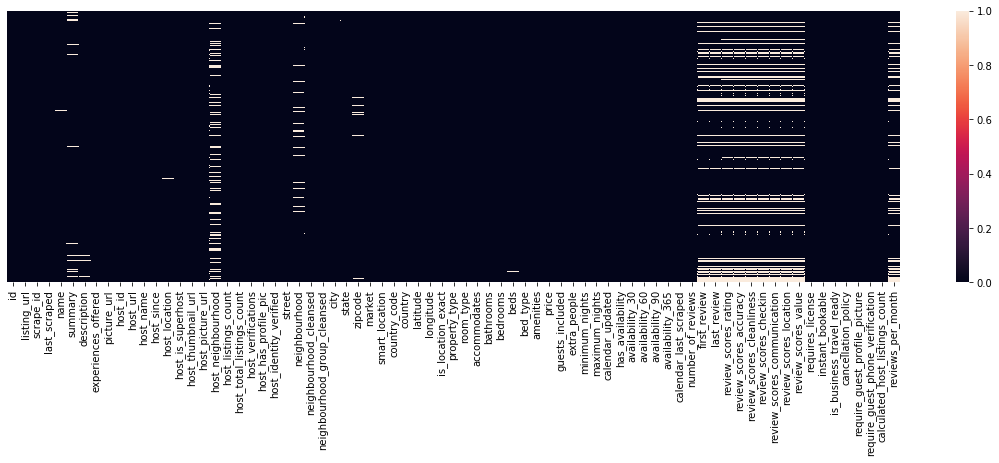

In [71]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.heatmap(list_summary1.isna(), yticklabels='')
plt.show()

In [72]:
list_summary1.shape

(22552, 75)

In [73]:
#get important feature
get_features = ["cancellation_policy","amenities","availability_365","requires_license","instant_bookable",
                "guests_included","extra_people","review_scores_rating","require_guest_phone_verification",
               "bathrooms","bedrooms","beds","bed_type","accommodates","host_total_listings_count","host_has_profile_pic",
               "host_identity_verified","is_location_exact","property_type","host_is_superhost","room_type","maximum_nights","minimum_nights"]
list_summary1 = list_summary1[get_features]
list_summary1.head()

,cancellation_policy,amenities,availability_365,requires_license,instant_bookable,guests_included,extra_people,review_scores_rating,require_guest_phone_verification,bathrooms,...,accommodates,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,host_is_superhost,room_type,maximum_nights,minimum_nights
0,strict_14_with_grace_period,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",141,t,f,1,$28.00,93.0,f,1.0,...,3,4.0,t,t,f,Guesthouse,t,Entire home/apt,1125,4
1,flexible,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",0,t,f,1,$0.00,100.0,f,1.0,...,2,1.0,t,t,t,Apartment,f,Private room,40,2
2,strict_14_with_grace_period,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",220,t,t,2,$20.00,92.0,f,1.0,...,4,1.0,t,t,t,Apartment,f,Entire home/apt,1125,62
3,strict_14_with_grace_period,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",297,t,f,1,$18.00,88.0,f,1.0,...,2,1.0,t,t,t,Apartment,f,Private room,360,5
4,moderate,"{Wifi,Heating,""Family/kid friendly"",Essentials...",26,t,f,1,$24.00,96.0,f,1.0,...,2,1.0,t,t,t,Apartment,t,Private room,10,2


In [74]:
list_summary1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 23 columns):
cancellation_policy                 22552 non-null object
amenities                           22552 non-null object
availability_365                    22552 non-null int64
requires_license                    22552 non-null object
instant_bookable                    22552 non-null object
guests_included                     22552 non-null int64
extra_people                        22552 non-null object
review_scores_rating                18163 non-null float64
require_guest_phone_verification    22552 non-null object
bathrooms                           22520 non-null float64
bedrooms                            22534 non-null float64
beds                                22512 non-null float64
bed_type                            22552 non-null object
accommodates                        22552 non-null int64
host_total_listings_count           22526 non-null float64
host_has_profile_pi

In [79]:
dict_tf = {'t':1,'T':1,'f':0,'F':0}
tf_cols = ['requires_license','instant_bookable','require_guest_phone_verification','host_has_profile_pic','host_identity_verified'
          ,'is_location_exact','host_is_superhost']
for i in tf_cols:
    list_summary1[i] = list_summary1[i].map(dict_tf)

In [81]:
list_summary1.head()

,cancellation_policy,amenities,availability_365,requires_license,instant_bookable,guests_included,extra_people,review_scores_rating,require_guest_phone_verification,bathrooms,...,accommodates,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,host_is_superhost,room_type,maximum_nights,minimum_nights
0,strict_14_with_grace_period,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",141,1,0,1,$28.00,93.0,0,1.0,...,3,4.0,1.0,1.0,0,Guesthouse,1.0,Entire home/apt,1125,4
1,flexible,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",0,1,0,1,$0.00,100.0,0,1.0,...,2,1.0,1.0,1.0,1,Apartment,0.0,Private room,40,2
2,strict_14_with_grace_period,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",220,1,1,2,$20.00,92.0,0,1.0,...,4,1.0,1.0,1.0,1,Apartment,0.0,Entire home/apt,1125,62
3,strict_14_with_grace_period,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",297,1,0,1,$18.00,88.0,0,1.0,...,2,1.0,1.0,1.0,1,Apartment,0.0,Private room,360,5
4,moderate,"{Wifi,Heating,""Family/kid friendly"",Essentials...",26,1,0,1,$24.00,96.0,0,1.0,...,2,1.0,1.0,1.0,1,Apartment,1.0,Private room,10,2


In [84]:
cat_cols = ["bed_type","property_type","cancellation_policy"]
list_summary2 = con_2_cat(list_summary1,cat_cols)

In [87]:
list_summary2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 63 columns):
amenities                                          22552 non-null object
availability_365                                   22552 non-null int64
requires_license                                   22552 non-null int64
instant_bookable                                   22552 non-null int64
guests_included                                    22552 non-null int64
extra_people                                       22552 non-null object
review_scores_rating                               18163 non-null float64
require_guest_phone_verification                   22552 non-null int64
bathrooms                                          22520 non-null float64
bedrooms                                           22534 non-null float64
beds                                               22512 non-null float64
accommodates                                       22552 non-null int64
host_total_listin

In [89]:
def amenities_edit(ele):
    length = len(ele.split(','))
    return length
list_summary2['amenities'] = list_summary2['amenities'].apply(amenities_edit)

In [97]:
list_summary2.extra_people = list_summary2.extra_people.str.replace('$','').astype(float)

In [98]:
list_summary2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 63 columns):
amenities                                          22552 non-null int64
availability_365                                   22552 non-null int64
requires_license                                   22552 non-null int64
instant_bookable                                   22552 non-null int64
guests_included                                    22552 non-null int64
extra_people                                       22552 non-null float64
review_scores_rating                               18163 non-null float64
require_guest_phone_verification                   22552 non-null int64
bathrooms                                          22520 non-null float64
bedrooms                                           22534 non-null float64
beds                                               22512 non-null float64
accommodates                                       22552 non-null int64
host_total_listin

In [101]:
del list_summary2['room_type']

In [102]:
_listings = listings1.astype(float)
_list_sum = list_summary2.astype(float)

In [103]:
#get features that contain nulls
null_cols = _list_sum.loc[:,_list_sum.isnull().sum() > 0].columns.values
print("Features that contain nulls;  \n",null_cols)

Features that contain nulls;  
 ['review_scores_rating' 'bathrooms' 'bedrooms' 'beds'
 'host_total_listings_count' 'host_has_profile_pic'
 'host_identity_verified' 'host_is_superhost']


In [114]:
for i in null_cols:
    _list_sum[i] = _list_sum[i].fillna(_list_sum[i].median())

In [116]:
print("list_summary null count :",_list_sum.isna().any().sum())
print("Dataset null count :",_listings.isna().any().sum())

list_summary null count : 0
Dataset null count : 0


In [120]:
data = pd.concat([_listings,_list_sum],axis = 1)

In [121]:
data.shape

(22552, 72)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 72 columns):
id                                                 22552 non-null float64
price                                              22552 non-null float64
minimum_nights                                     22552 non-null float64
number_of_reviews                                  22552 non-null float64
calculated_host_listings_count                     22552 non-null float64
availability_365                                   22552 non-null float64
distance_km                                        22552 non-null float64
room_type_Entire home/apt                          22552 non-null float64
room_type_Private room                             22552 non-null float64
room_type_Shared room                              22552 non-null float64
amenities                                          22552 non-null float64
availability_365                                   22552 non-null float64
req

In [139]:
data = data.loc[:,~data.columns.duplicated()]

In [141]:
data.shape

(22552, 70)

In [123]:
def detect_outlier(data_1):
    feature_outliers=[]
    threshold=7
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    counter=0
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            feature_outliers.append(counter)
        counter += 1
    return feature_outliers

In [140]:
outliers = np.array([])
print("--Feature and Outlier Counts--\n")
for i in data.columns:
    f_out = detect_outlier(data[i])
    outliers = np.concatenate((outliers,np.asarray(f_out)))
    print(i ," outlier count :",len(f_out))
                              
outliers = np.unique(outliers,0)
print("Total Unique Outlier Index Count:",len(outliers))

--Feature and Outlier Counts--

id  outlier count : 0
price  outlier count : 34
minimum_nights  outlier count : 18
number_of_reviews  outlier count : 60
calculated_host_listings_count  outlier count : 118
availability_365  outlier count : 0
distance_km  outlier count : 10
room_type_Entire home/apt  outlier count : 0
room_type_Private room  outlier count : 0
room_type_Shared room  outlier count : 296
amenities  outlier count : 0
requires_license  outlier count : 8
instant_bookable  outlier count : 0
guests_included  outlier count : 52
extra_people  outlier count : 28
review_scores_rating  outlier count : 58
require_guest_phone_verification  outlier count : 279
bathrooms  outlier count : 29
bedrooms  outlier count : 20
beds  outlier count : 47
accommodates  outlier count : 37
host_total_listings_count  outlier count : 4
host_has_profile_pic  outlier count : 56
host_identity_verified  outlier count : 0
is_location_exact  outlier count : 0
host_is_superhost  outlier count : 0
maximum_night

In [142]:
clean_data = data.drop(outliers,axis=0)
clean_data.describe()

,id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_km,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,...,property_type_Tiny house,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Villa,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
count,1.978400e+04,19784.000000,19784.000000,19784.000000,19784.000000,19784.000000,19784.000000,19784.000000,19784.000000,19784.0,...,19784.0,19784.0,19784.0,19784.0,19784.0,19784.000000,19784.000000,19784.000000,19784.0,19784.0
mean,1.595192e+07,57.584513,6.609786,16.135766,1.582744,72.587040,4.365571,0.481551,0.518449,0.0,...,0.0,0.0,0.0,0.0,0.0,0.410736,0.316013,0.273251,0.0,0.0
std,8.451127e+06,46.554899,16.414434,31.635945,1.980323,114.861905,2.321578,0.499672,0.499672,0.0,...,0.0,0.0,0.0,0.0,0.0,0.491980,0.464930,0.445640,0.0,0.0
min,2.695000e+03,0.000000,1.000000,0.000000,1.000000,0.000000,0.198956,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,8.347268e+06,30.000000,2.000000,1.000000,1.000000,0.000000,2.953972,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,1.728151e+07,45.000000,3.000000,5.000000,1.000000,1.000000,4.049470,0.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,2.271256e+07,70.000000,4.000000,15.000000,1.000000,98.000000,5.428896,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0
max,2.986735e+07,1500.000000,240.000000,275.000000,19.000000,365.000000,23.146792,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 70 columns):
id                                                 22552 non-null float64
price                                              22552 non-null float64
minimum_nights                                     22552 non-null float64
number_of_reviews                                  22552 non-null float64
calculated_host_listings_count                     22552 non-null float64
availability_365                                   22552 non-null float64
distance_km                                        22552 non-null float64
room_type_Entire home/apt                          22552 non-null float64
room_type_Private room                             22552 non-null float64
room_type_Shared room                              22552 non-null float64
amenities                                          22552 non-null float64
requires_license                                   22552 non-null float64
ins

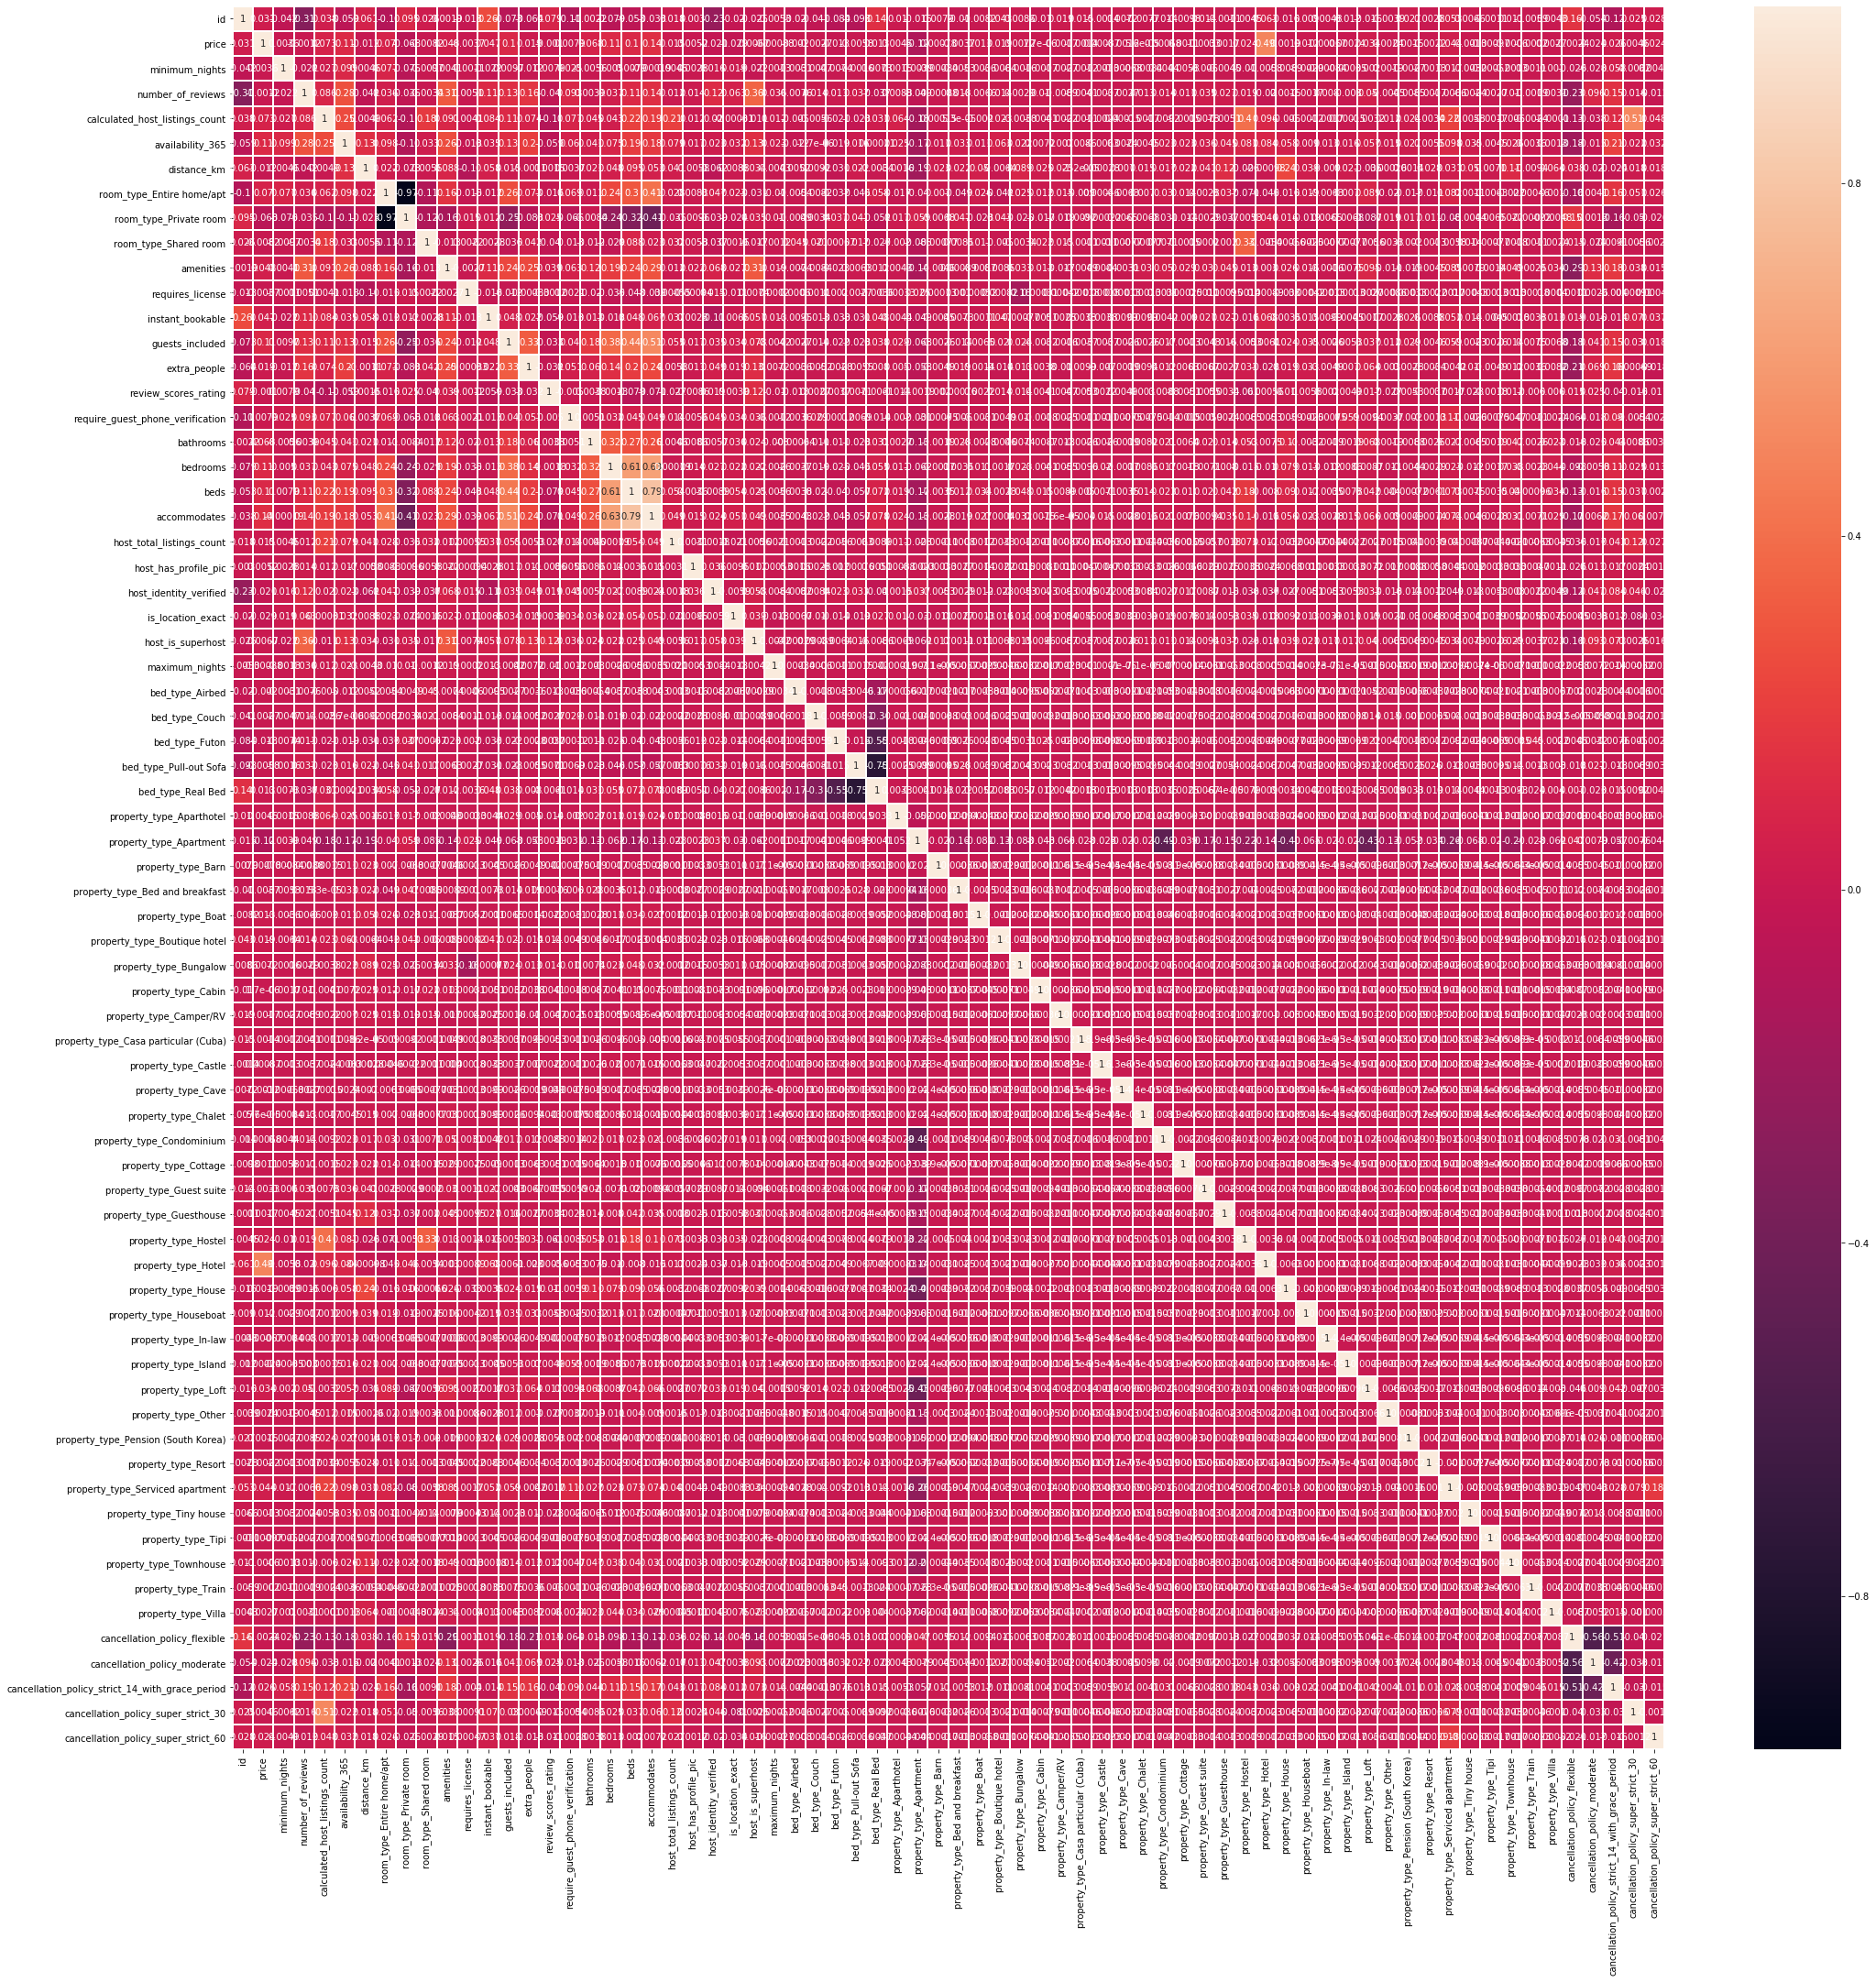

In [144]:
f, ax = plt.subplots( figsize=(35,35) )
sns.heatmap(data.corr(),annot=True,linewidths=1)
plt.show()

In [145]:
data.to_csv('airbnb.csv')